# Comparative study of Seattle & Boston AirBnB Market

## 1. [Introduction](#introduction)
2. [Data Exploration](#data-exploration)
3. [Data Preparation](#data-preparation)
4. [Conclusion](#conclusion)

## 1. Introduction<a name="introduction"></a>

AIR BNB, a contemporary  business model,people share there rooms/appartement as part time accomodation. Data set are provided in [Kaggel comeptition](https://www.kaggle.com/), Here We are studying the data sets of two cities Boston and Seattle , hopefully We can find few interesting insights.

Questions:
- What is the peak period in Boston AirBnB? How does the price change?
- What was the effect of review rating on the price? 
- Which type room is most available?
- Sentiment analysis for places?



In [14]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
pd.set_option("max_columns", None)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime

%matplotlib inline

### Read Data set for two cities

In [15]:
# input the seattle data from local directory
stl_reviews  = pd.read_csv('reviews_seattel.csv');
stl_calendar = pd.read_csv('calendar_seattel.csv');
stl_listings = pd.read_csv('listings_seattle.csv');
# input the boston data from local directory
bst_reviews  = pd.read_csv('reviews_boston.csv');
bst_calendar = pd.read_csv('calendar_boston.csv');
bst_listings = pd.read_csv('listings_boston.csv');

## 2. Data Exploration<a name="data-exploration"></a>

In [16]:
bst_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [17]:
# converting available to 1 & 0 from t and f 
# Change data type to date 
stl_calendar['year'] = pd.to_datetime(stl_calendar['date']).dt.year
stl_calendar['available'] = stl_calendar["available"].apply(lambda x:1 if x=="t" else 0)

 
bst_calendar['year'] = pd.to_datetime(bst_calendar['date']).dt.year
bst_calendar['available'] = np.where(bst_calendar['available']=='t', 1, 0)

In [18]:
# Based on listing ID getting sum of available occupancy 
stl_calendar['available_property'] = stl_calendar.groupby('listing_id')['available'].mean().reset_index(drop=True)
bst_calendar['available_property'] = bst_calendar.groupby('listing_id')['available'].mean().reset_index(drop=True)

C:\Users\sarth\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sarth\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


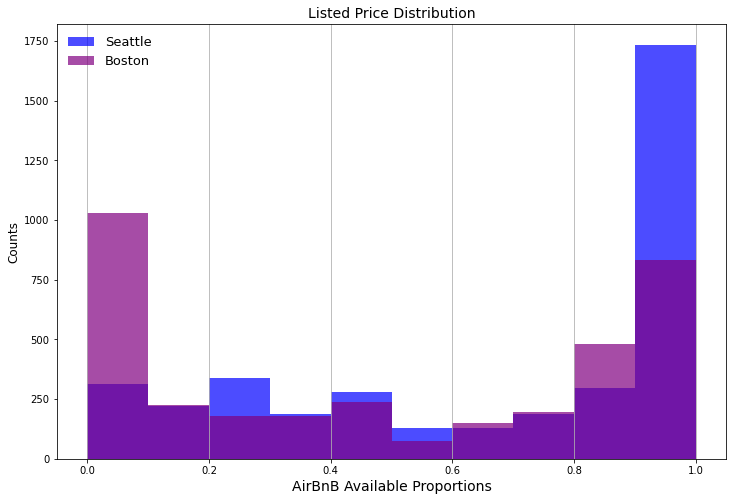

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(stl_calendar['available_property'], color='blue',alpha=0.7)
plt.hist(bst_calendar['available_property'], color='purple', alpha=0.7)
plt.grid(axis='x')
plt.margins(0.05)
plt.legend(['Seattle','Boston'],fontsize=13,frameon=False)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('AirBnB Available Proportions', fontsize=14)
plt.title('Listed Price Distribution', fontsize=14);
plt.show()


In [20]:
# Removing comma & $ sign from price and converting NaN to zero
stl_calendar['price'] = stl_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
stl_calendar['price'] = stl_calendar['price'].fillna(0)
 
bst_calendar['price'] = bst_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
bst_calendar['price'] = bst_calendar['price'].fillna(0)  

stl_calendar['index'] = pd.to_datetime(stl_calendar['date']).dt.month
stl_calendar['month'] = pd.to_datetime(stl_calendar['date']).dt.date.apply(lambda m : m.strftime("%b"))

bst_calendar['index'] = pd.to_datetime(bst_calendar['date']).dt.month
bst_calendar['month'] = pd.to_datetime(bst_calendar['date']).dt.date.apply(lambda m : m.strftime("%b"))

stl_calendar = stl_calendar.set_index(stl_calendar['index']).sort_index()
bst_calendar = bst_calendar.set_index(bst_calendar['index']).sort_index()



In [21]:
##st_calc = stl_calendar[stl_calendar['price'] >= 0]
st_available_proprty_month = stl_calendar.groupby('month',sort=False)['available'].mean()
##del st_calc 
 

##bst_calc = bst_calendar[bst_calendar['price'] >= 0]
bst_available_proprty_month = bst_calendar.groupby('month',sort=False)['available'].mean()
##del bst_calc 
 
 

In [22]:
st_price_month = stl_calendar.groupby('month',sort=False)['price'].mean()


bst_price_month = bst_calendar.groupby('month',sort=False)['price'].mean()

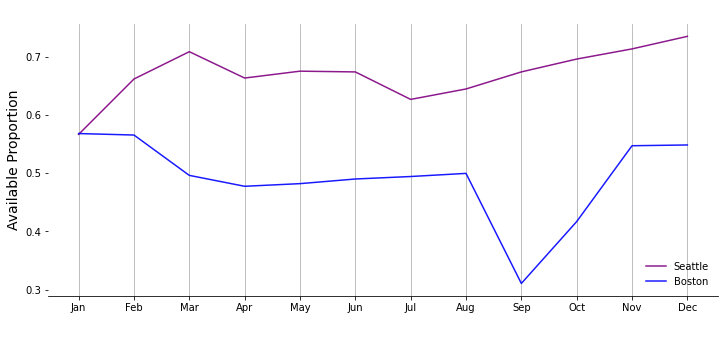

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(st_available_proprty_month, color='purple', alpha=0.9)
plt.plot(bst_available_proprty_month, color='blue', alpha=0.9)

plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel(' ', fontsize=14)
plt.title(' ', fontsize=14);
plt.ylabel('Available Proportion', fontsize=14)

plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.grid(axis='x')
plt.show()

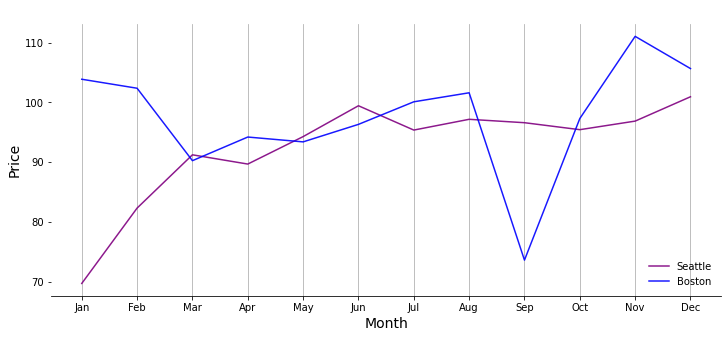

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(st_price_month, color='purple', alpha=0.9)
plt.plot(bst_price_month, color='blue', alpha=0.9)
plt.ylabel('Available Proportion', fontsize=12)
plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title(' ', fontsize=14);

plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.grid(axis='x')
plt.show()

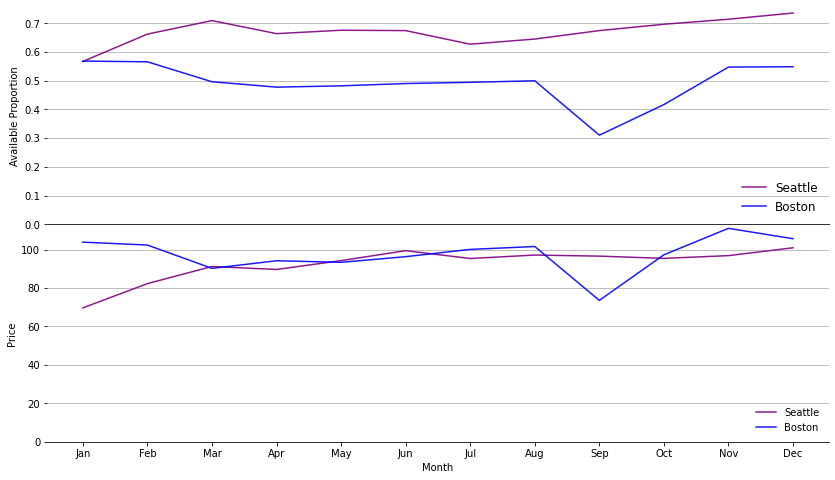

In [25]:
#plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2,figsize=(14, 8),sharex=True, gridspec_kw={'hspace': 0})
ax[0].plot(st_available_proprty_month, color='purple', alpha=0.9)
ax[0].plot(bst_available_proprty_month, color='blue', alpha=0.9)
ax[1].plot(st_price_month, color='purple', alpha=0.9)
ax[1].plot(bst_price_month, color='blue', alpha=0.9)

ax[0].set(title='', ylabel='Available Proportion', xlabel='')
ax[0].margins(0.05)
ax[0].set_ylim(bottom=0)
ax[0].legend(['Seattle','Boston'],fontsize=12,loc=4,frameon=False)
ax[0].grid(axis='y')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].set(title='', ylabel='Price', xlabel='Month')
ax[1].margins(0.05)
ax[1].set_ylim(bottom=0)
ax[1].legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
ax[1].grid(axis='y')

ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)

 
plt.show()

### Day wise analysis

In [26]:
stl_calendar['day'] = pd.to_datetime(stl_calendar['date']).dt.dayofyear
bst_calendar['day'] = pd.to_datetime(bst_calendar['date']).dt.dayofyear

In [27]:
st_available_proprty_day = stl_calendar.groupby('date')['available'].mean().reset_index(drop=True)
bst_available_proprty_day = bst_calendar.groupby('date')['available'].mean().reset_index(drop=True)
st_price_day = stl_calendar.groupby('day')['price'].mean()
bst_price_day = bst_calendar.groupby('day')['price'].mean()

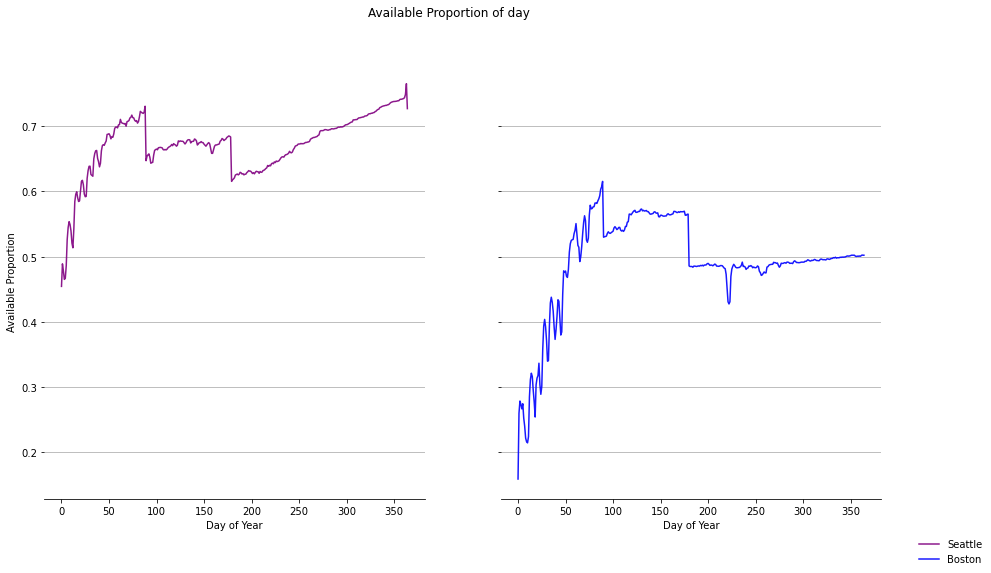

In [28]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 8) ,sharey= True)
fig.suptitle('Available Proportion of day')
ax1.plot(st_available_proprty_day, color='purple', alpha=0.9)
ax2.plot(bst_available_proprty_day, color='blue', alpha=0.9)
fig.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
ax1.set(title='', ylabel='Available Proportion', xlabel='Day of Year')
ax2.set(title='', ylabel='', xlabel='Day of Year')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y')
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(axis='y')

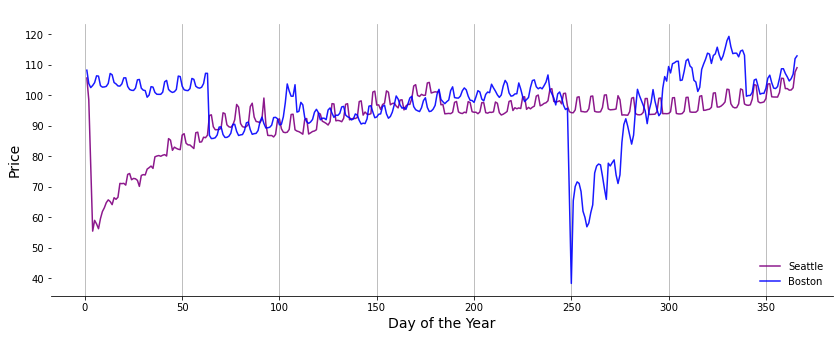

In [29]:
plt.figure(figsize=(14, 5))
plt.plot(st_price_day, color='purple', alpha=0.9)
plt.plot(bst_price_day, color='blue', alpha=0.9)
plt.ylabel('Available Proportion', fontsize=12)
plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('Day of the Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title(' ', fontsize=14);

plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.grid(axis='x')
plt.show()

#### Data analysis for Listing data sets 

In [30]:
stl_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [31]:
bst_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [32]:
bst_listings.shape

(3585, 95)

In [33]:
stl_listings.shape

(3818, 92)

Boston has 95 attributes whereas Seattle has 92 , extra columns in boston are **'access', 'interaction', 'house_rules'**
Removing those columns

In [34]:
bst_listings = bst_listings.drop(labels =[ 'access', 'interaction', 'house_rules'] , axis =1)
bst_listings.shape

(3585, 92)

In [35]:
bst_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [36]:
stl_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There are 30 numeric columns for seattel and 33 numeric columns . Boston data set has 3585 records and Seattel data set is with 
3818 records. 

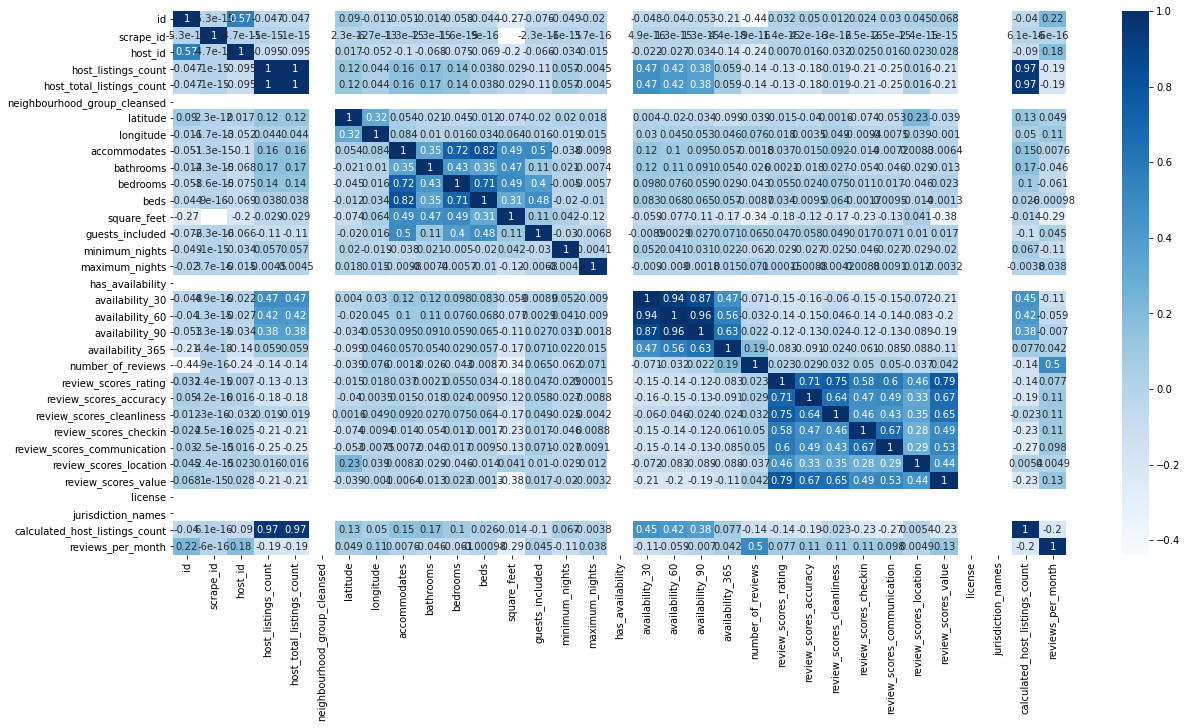

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = bst_listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

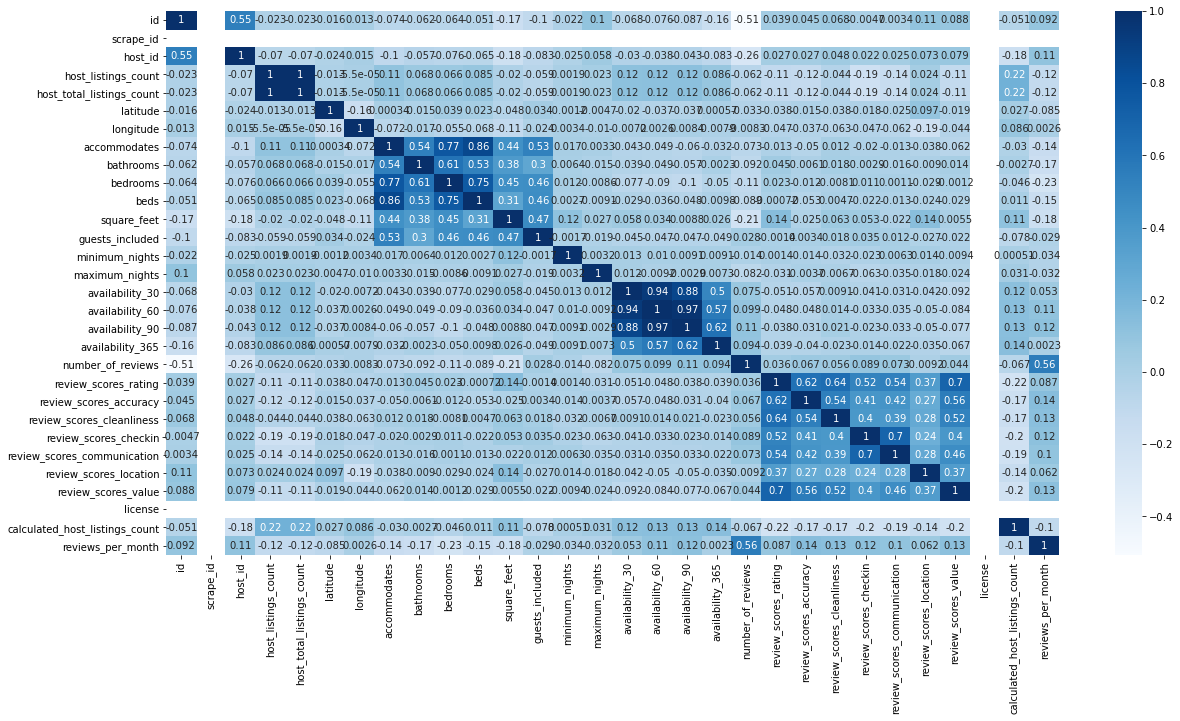

In [38]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = stl_listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Most important factors are **Accommodates, Bathrooms, Bedrooms, beds, square_feet, guests_included and price**

## 2. Data Preparation<a name="data-preparation"></a>

Cleaning data sets 

In [39]:
def make_clean_df (df):
    '''
    Input panda dataframe 
    
    Output ---- cleaned data set 
    Removal of unwanted attribute 
    Convert attribute containing price into numerical data type
    Managing missing or null value with suitable method 
    '''

    #make a list of unwanted columns
    unwanted_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'space', 'description', \
                    'experiences_offered', 'neighborhood_overview', \
                    'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_location', 'host_about', 'host_thumbnail_url', \
                    'host_picture_url', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', \
                    'street', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'weekly_price', 'monthly_price',\
                    'calendar_updated', 'has_availability', 'host_total_listings_count',
       'availability_30', 'availability_60', 'availability_90', 'host_verifications',
       'availability_365', 'calendar_last_scraped', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'] 
    
    ## drop unwanted columns   
    df = df.drop(labels = unwanted_columns, axis =1)
    
    
    df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
    df['security_deposit'] = df['security_deposit'].fillna(0)
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['price'] = df['price'].fillna(0)   
    df['cleaning_fee']=df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    df['extra_people']=df['extra_people'].str.replace("[$, ]", "").astype("float")
    df['host_response_rate'] = df['host_response_rate'].str.replace("[%, ]", "").astype("float")/100
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("[%, ]", "").astype("float")/100
    
    return df 

In [40]:
# Apply data cleaning functions  
cl_stl_listings = make_clean_df(stl_listings)
cl_bst_listings = make_clean_df(bst_listings)

In [41]:
print (cl_bst_listings.shape, cl_stl_listings.shape)

(3585, 33) (3818, 33)


Checking most of the NULL valued attribute in data and dropping those columns 

In [42]:
cl_bst_listings.columns[cl_bst_listings.isna().mean() > 0.75]

Index(['neighbourhood_group_cleansed', 'square_feet'], dtype='object')

In [43]:
cl_stl_listings.columns[cl_stl_listings.isna().mean() > 0.75]

Index(['square_feet'], dtype='object')

In [44]:
cl_stl_listings= cl_stl_listings.drop(['neighbourhood_group_cleansed', 'square_feet'],axis =1)
cl_bst_listings= cl_bst_listings.drop(['neighbourhood_group_cleansed', 'square_feet'],axis =1)
print (cl_bst_listings.shape, cl_stl_listings.shape)

(3585, 31) (3818, 31)


In [45]:
cl_bst_listings.head()

,summary,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month
0,"Cozy, sunny, family home. Master bedroom high...",2015-04-15,NaN,NaN,NaN,f,1,Roslindale,Roslindale,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,0.0,35.0,1,0.0,2,1125,0,NaN,f,f,moderate,NaN
1,Charming and quiet room in a second floor 1910...,2012-06-07,within an hour,1.0,1.00,f,1,Roslindale,Roslindale,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,95.0,10.0,0,0.0,2,15,36,94.0,f,t,moderate,1.30
2,"Come stay with a friendly, middle-aged guy in ...",2009-05-11,within a few hours,1.0,0.88,t,1,Roslindale,Roslindale,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,0.0,NaN,1,20.0,3,45,41,98.0,f,f,moderate,0.47
3,Come experience the comforts of home away from...,2013-04-21,within a few hours,1.0,0.50,f,1,NaN,Roslindale,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,100.0,50.0,2,25.0,1,1125,1,100.0,f,f,moderate,1.00
4,"My comfy, clean and relaxing home is one block...",2014-05-11,within an hour,1.0,1.00,t,1,Roslindale,Roslindale,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,0.0,15.0,1,0.0,2,31,29,99.0,f,f,flexible,2.25


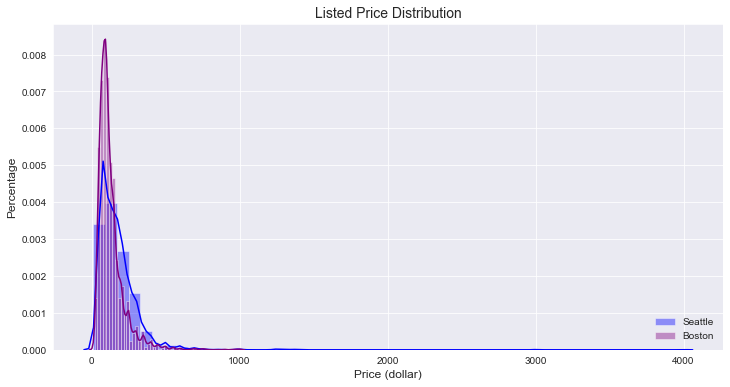

In [46]:

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.distplot(cl_bst_listings['price'] ,color='blue', bins=50, kde=True)
sns.distplot(cl_stl_listings['price'] ,color='purple', bins=50, kde=True)
plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

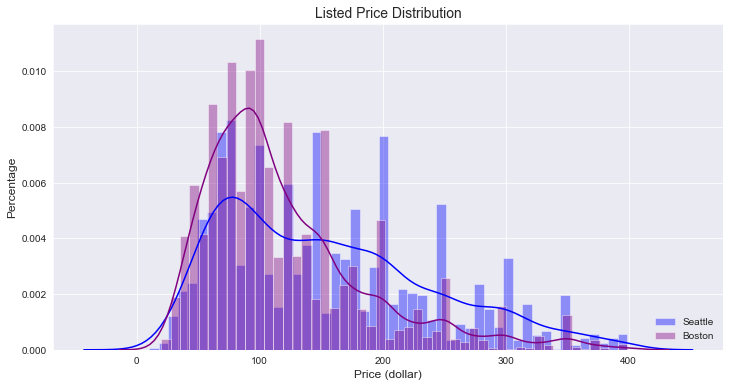

In [47]:
df1=cl_bst_listings[cl_bst_listings.price <400]
df2=cl_stl_listings[cl_stl_listings.price <400]

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.distplot(df1['price'] ,color='blue', bins=50, kde=True)
sns.distplot(df2['price'] ,color='purple', bins=50, kde=True)
plt.legend(['Seattle','Boston'],fontsize=10,loc=4,frameon=False)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

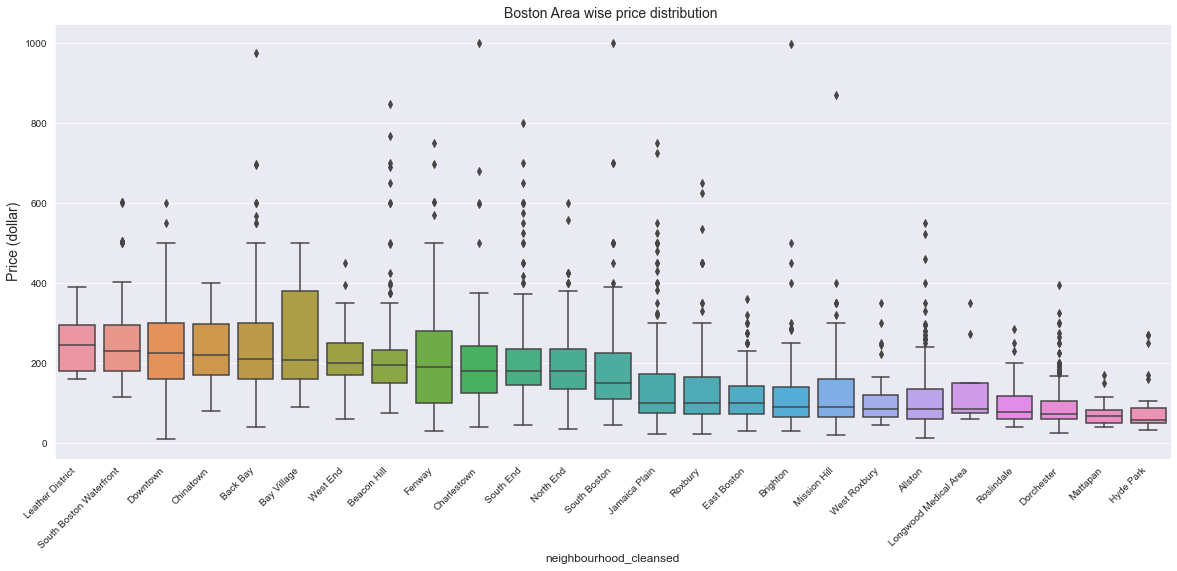

In [48]:
sort_order =cl_bst_listings.query('price <= 1000').groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,8))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=cl_bst_listings.query('price <= 1000'), 
            order=sort_order)
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('neighbourhood_cleansed', fontsize=12)
plt.title('Boston Area wise price distribution ', fontsize=14);
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

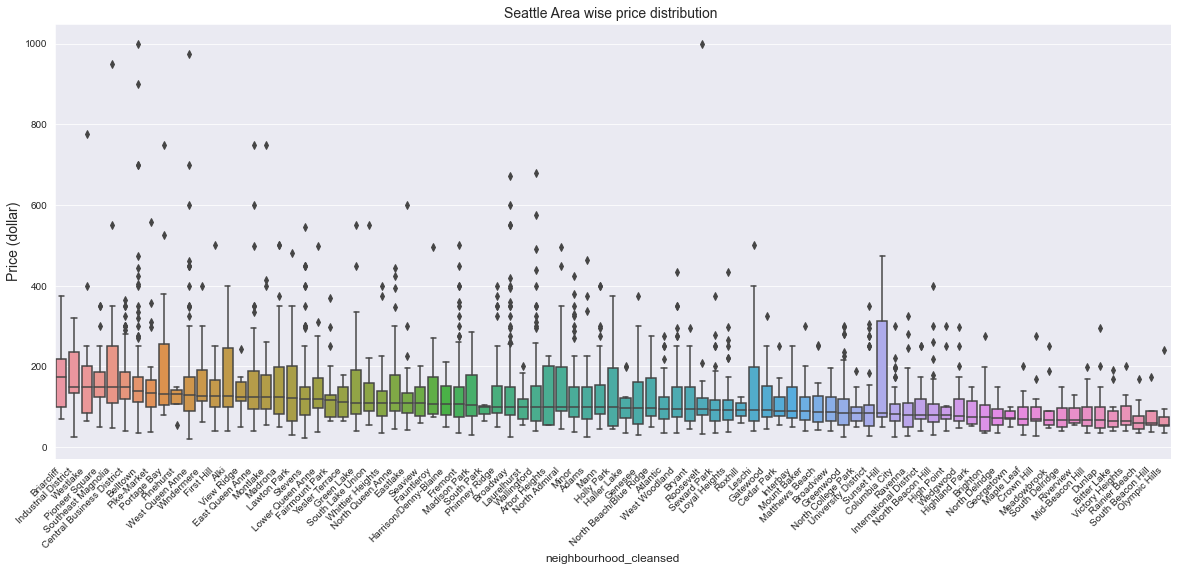

In [49]:
sort_order =cl_stl_listings.query('price <= 1000').groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,8))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=cl_stl_listings.query('price <= 1000'), 
            order=sort_order)
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('neighbourhood_cleansed', fontsize=12)
plt.title('Seattle Area wise price distribution ', fontsize=14);
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

<Figure size 1800x3600 with 0 Axes>

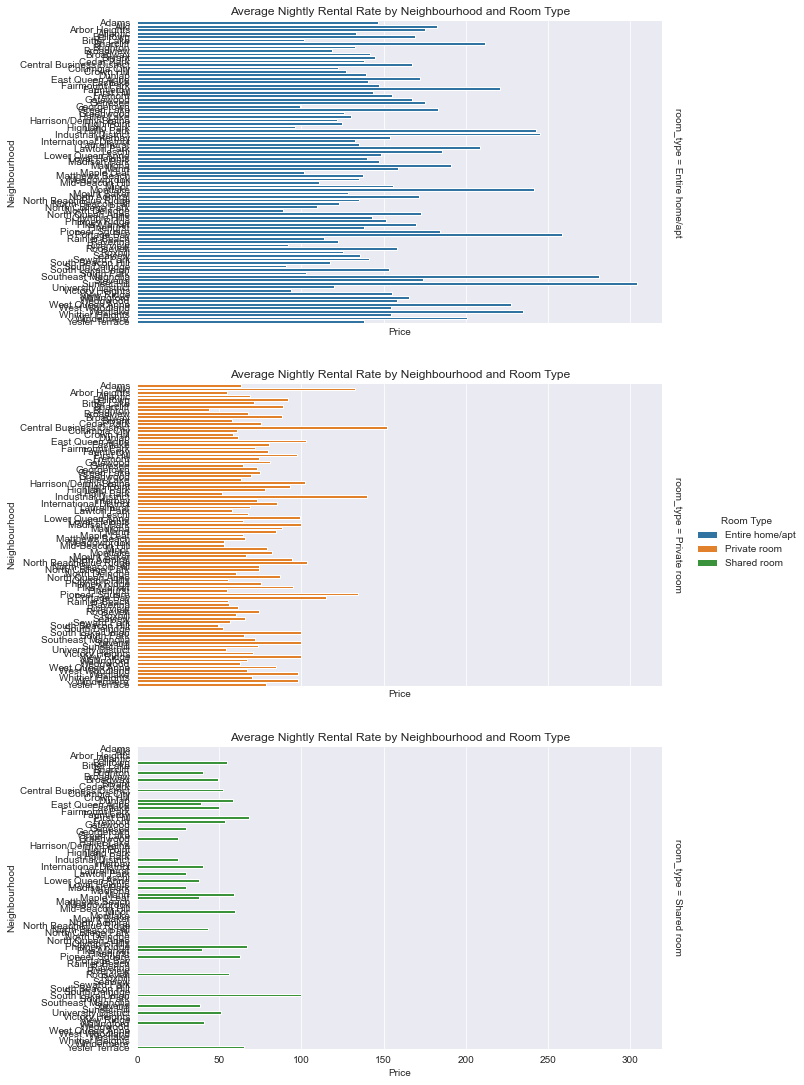

In [50]:
#Unique and sorted neighbourhood 
neighbourhood_list=cl_stl_listings["neighbourhood_cleansed"].dropna().unique()
sorted_neighbourhood=sorted(neighbourhood_list)

# create clustered bar plot for average price by Neighbourhood and room type
plt.figure(figsize=(25,50))
p=sns.FacetGrid(cl_stl_listings,row="room_type",hue="room_type",height=5,aspect=2,margin_titles=True)
p.map(sns.barplot,"price","neighbourhood_cleansed",ci=None,order=sorted_neighbourhood).fig.subplots_adjust(wspace=.07, hspace=.2)
p.add_legend(title="Room Type")
p.set(xlabel="Price",ylabel="Neighbourhood",title="Average Nightly Rental Rate by Neighbourhood and Room Type")
plt.show()

Property Type vd Price 

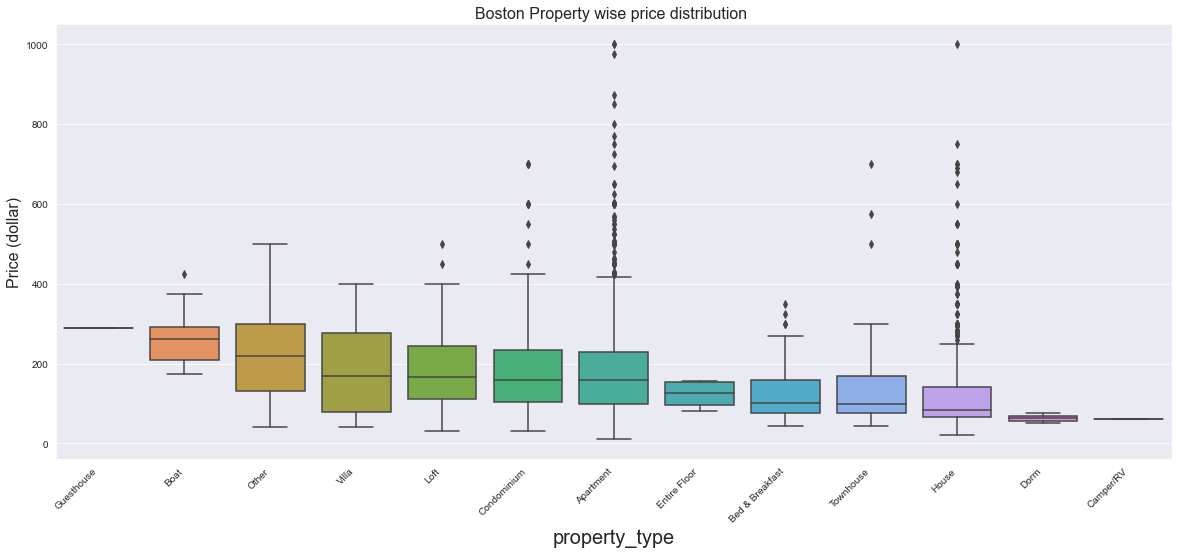

In [51]:
sort_order =cl_bst_listings.query('price <= 1000').groupby('property_type')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,8))
sns.boxplot(y='price', x='property_type', data=cl_bst_listings.query('price <= 1000'), 
            order=sort_order)
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('property_type', fontsize=20)
plt.title('Boston Property wise price distribution ', fontsize=16);
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

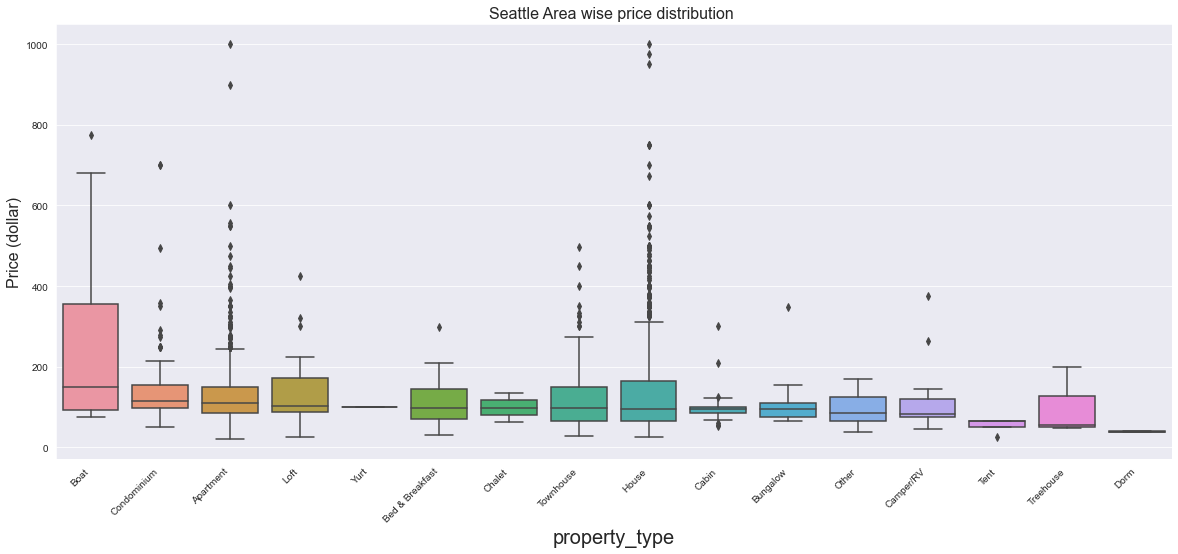

In [52]:
sort_order =cl_stl_listings.query('price <= 1000').groupby('property_type')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,8))
sns.boxplot(y='price', x='property_type', data=cl_stl_listings.query('price <= 1000'), 
            order=sort_order)
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('property_type', fontsize=20)
plt.title('Seattle Area wise price distribution ', fontsize=16);
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

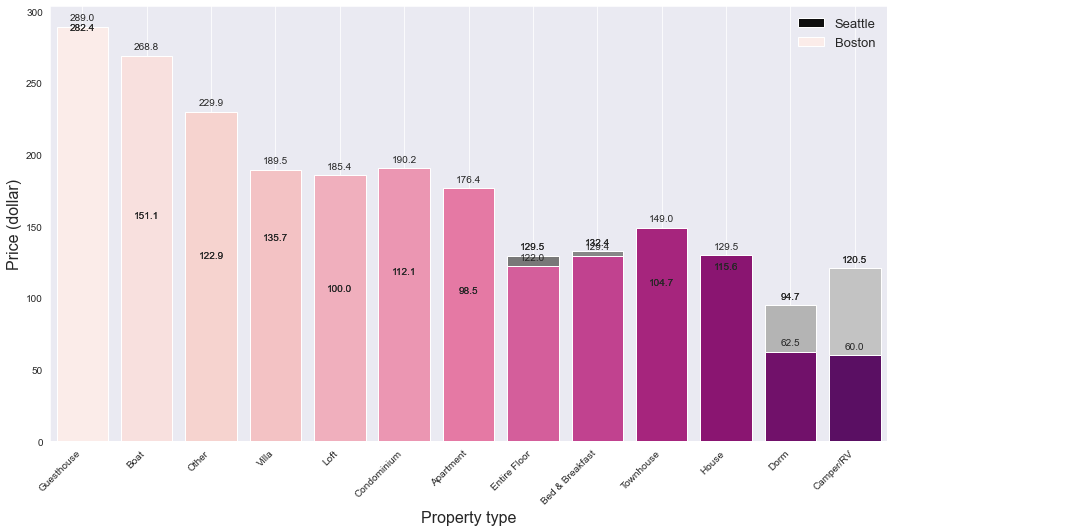

In [53]:
sort_order_s =cl_stl_listings.query('price <= 1000').groupby('property_type')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(15,8))
splot=sns.barplot(y='price', x='property_type', data=cl_stl_listings.query('price <= 1000'), order=sort_order_s,palette='gist_yarg_r',ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
sort_order_b =cl_bst_listings.query('price <= 1000').groupby('property_type')['price'].median().sort_values(ascending=False)\
                    .index  
splot1=sns.barplot(y='price', x='property_type', data=cl_bst_listings.query('price <= 1000'), order=sort_order_b,palette='RdPu',ci=None)

for p in splot.patches:
    splot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.grid(b=None, which='major', axis='both')
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('Property type', fontsize=16)
plt.legend(['Seattle','Boston'],fontsize=13,frameon=False)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


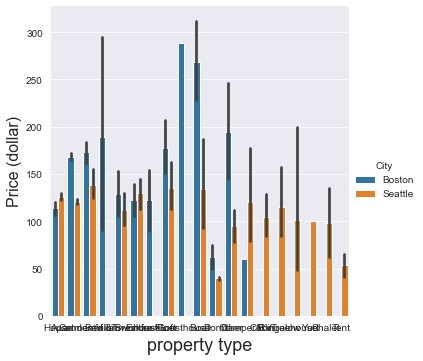

In [54]:
df1=cl_bst_listings[cl_bst_listings.price <500]
df2=cl_stl_listings[cl_stl_listings.price <500]

data= (df1["price"], df1["property_type"])
header =[ "Price", "property_type"]
df3 = pd.concat(data, axis=1, keys=header)
df3["City"] ="Boston"

data= (df2["price"], df2["property_type"])
df4 = pd.concat(data, axis=1, keys=header)
df4["City"] ="Seattle"
df4.head()

frames = [df3, df4]
df =  pd.concat(frames)

sns.factorplot(x='property_type', y='Price', hue='City', kind='bar', data=df)

plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('property type', fontsize=18)
fig.set_size_inches(14, 4)
plt.show()
del df4 ,df3 ,df


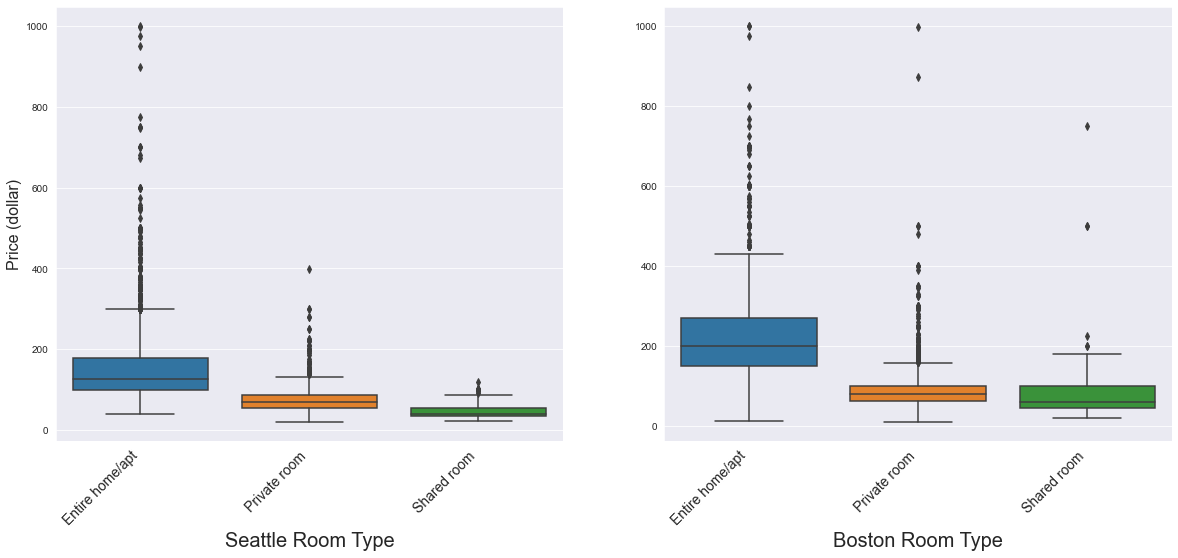

In [55]:
 
sort_order_s =cl_stl_listings.query('price<=1000').groupby('room_type')['price'].median().sort_values(ascending=False).index

sort_order_b = cl_bst_listings.query('price <= 1000').groupby('room_type')['price'].median().sort_values(ascending=False)\
                    .index

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.boxplot(y='price',x='room_type',data=cl_stl_listings.query('price<=1000'),order=sort_order_s);
ax=plt.gca();
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('Seattle Room Type', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize =14);

plt.subplot(1, 2, 2)
sns.boxplot(y='price',x='room_type',data=cl_bst_listings.query('price<=1000'),order=sort_order_b);
ax=plt.gca();
plt.ylabel(' ', fontsize=16)
plt.xlabel('Boston Room Type', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize =14);
plt.show()

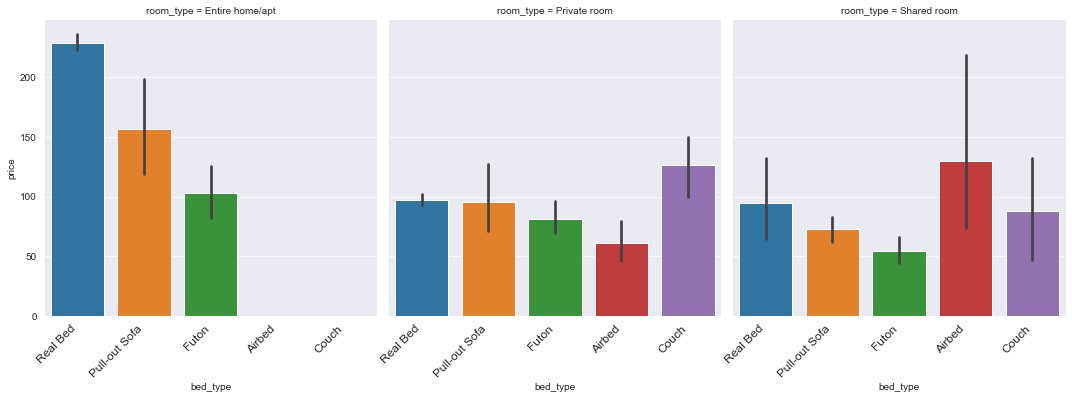

In [56]:
bst_rm_bed=sns.catplot(x='bed_type', y='price', col = 'room_type', kind='bar', data=cl_bst_listings)
bst_rm_bed.set_xticklabels(rotation=45, horizontalalignment='right', fontsize =12)



<Figure size 1440x576 with 0 Axes>

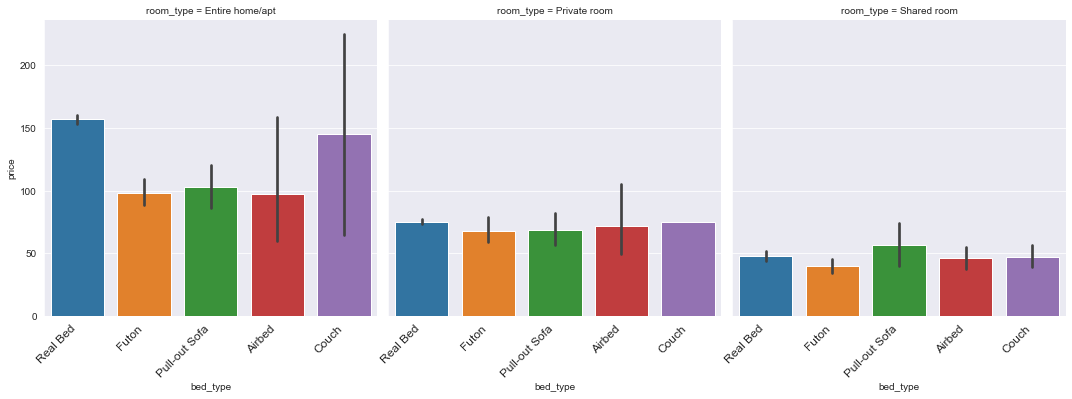

<Figure size 1440x576 with 0 Axes>

In [57]:
bst_rm_bed=sns.catplot(x='bed_type', y='price', col = 'room_type', kind='bar', data=cl_stl_listings)
bst_rm_bed.set_xticklabels(rotation=45, horizontalalignment='right', fontsize =12)
plt.figure(figsize=(20,8))



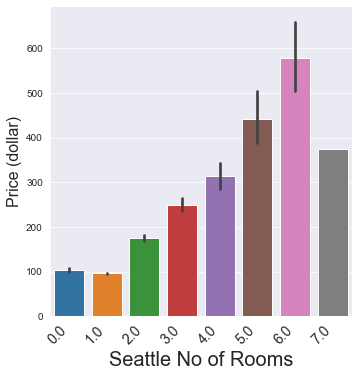

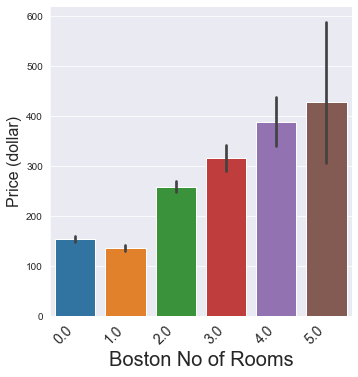

In [58]:
 
st_bd_price=sns.catplot(x='bedrooms', y='price',   kind='bar',data=cl_stl_listings)
st_bd_price.set_xticklabels(rotation=45, horizontalalignment='right')
ax=plt.gca();
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('Seattle No of Rooms', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize =14);

 
bst_bd_price=sns.catplot(x='bedrooms', y='price',   kind='bar',data=cl_bst_listings)
bst_bd_price.set_xticklabels(rotation=45, horizontalalignment='right')
ax=plt.gca();
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('Boston No of Rooms', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize =14);

In [59]:
data= (cl_stl_listings["price"], cl_stl_listings["bedrooms"])
header =[ "Price", "Bedrooms"]
df3 = pd.concat(data, axis=1, keys=header)
df3["City"] ="Seattle"

data= (cl_bst_listings["price"], cl_bst_listings["bedrooms"])
df4 = pd.concat(data, axis=1, keys=header)
df4["City"] ="Boston"
df4.head()

frames = [df3, df4]
df =  pd.concat(frames)

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


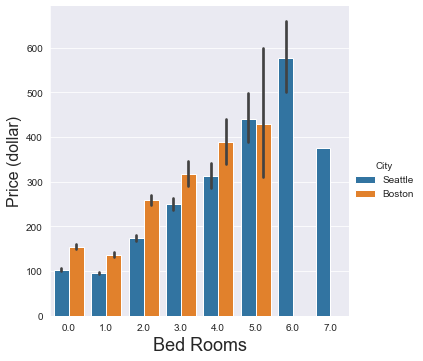

<Figure size 1296x720 with 0 Axes>

In [60]:
sns.factorplot(x='Bedrooms', y='Price', hue='City', kind='bar', data=df)
plt.ylabel('Price (dollar)', fontsize=16)
plt.xlabel('Bed Rooms', fontsize=18)
plt.figure(figsize=(18,10))
del df4 ,df3 ,df

In [61]:
cl_stl_listings['amenities'] = cl_stl_listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

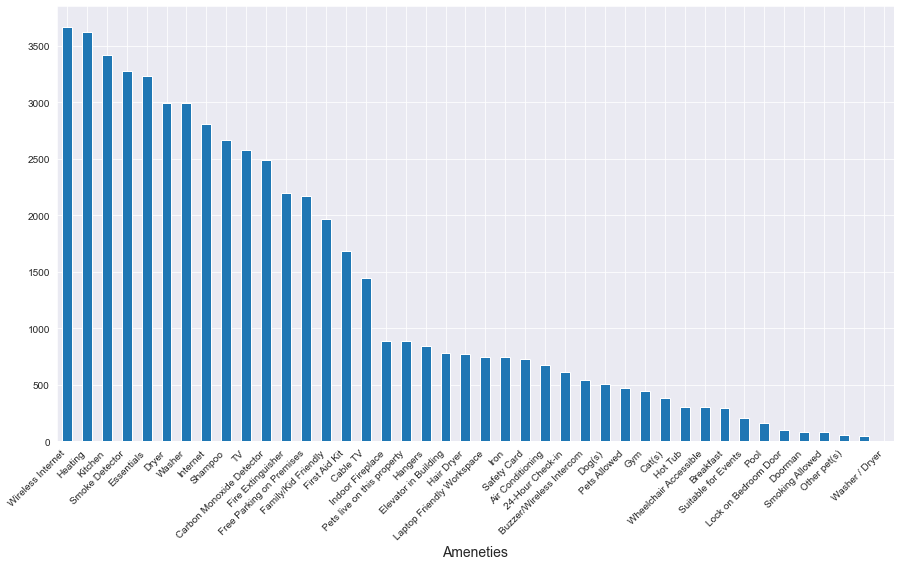

In [62]:
plt.figure(figsize=(15,8))
pd.Series(np.concatenate(cl_stl_listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar')

plt.xlabel('Ameneties', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.show()

In [63]:
amenities = np.unique(np.concatenate(cl_stl_listings['amenities'].map(lambda amns: amns.split("|"))))

amenity_prices = [(amn, cl_stl_listings[cl_stl_listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

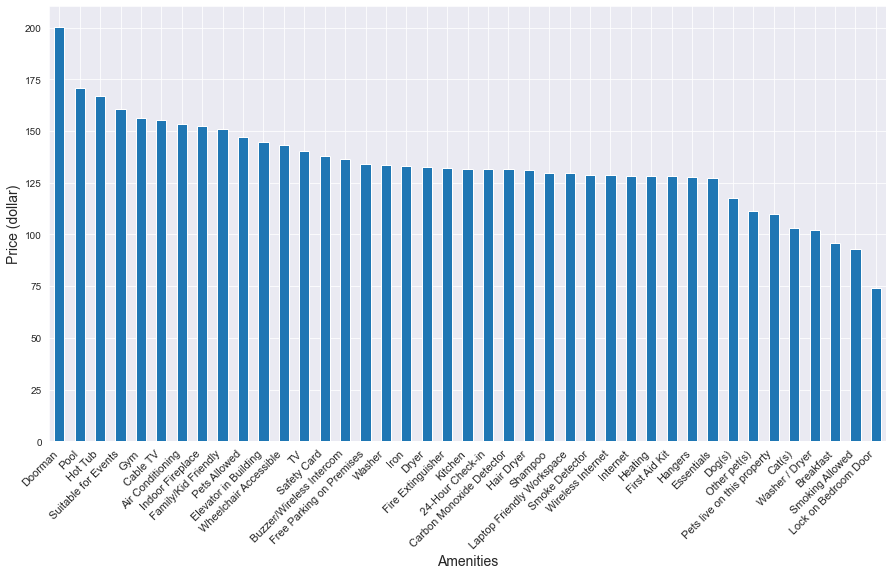

In [64]:
plt.figure(figsize=(15,8))
amenity_srs.sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('Amenities', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
plt.show()

In [65]:
cl_bst_listings['amenities'] = cl_bst_listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

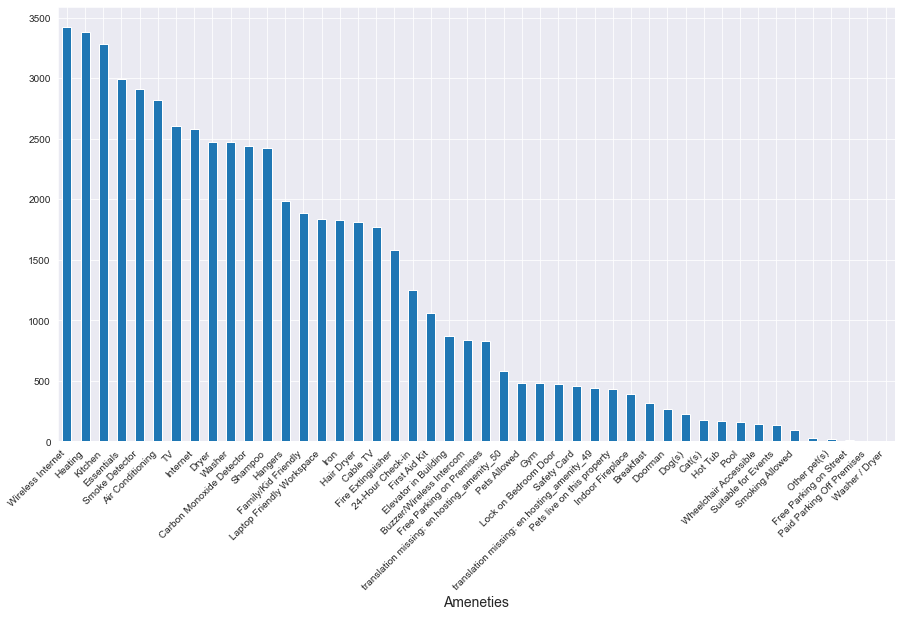

In [66]:
plt.figure(figsize=(15,8))
pd.Series(np.concatenate(cl_bst_listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar')

plt.xlabel('Ameneties', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.show()

In [67]:
amenities = np.unique(np.concatenate(cl_bst_listings['amenities'].map(lambda amns: amns.split("|"))))

amenity_prices = [(amn, cl_bst_listings[cl_bst_listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

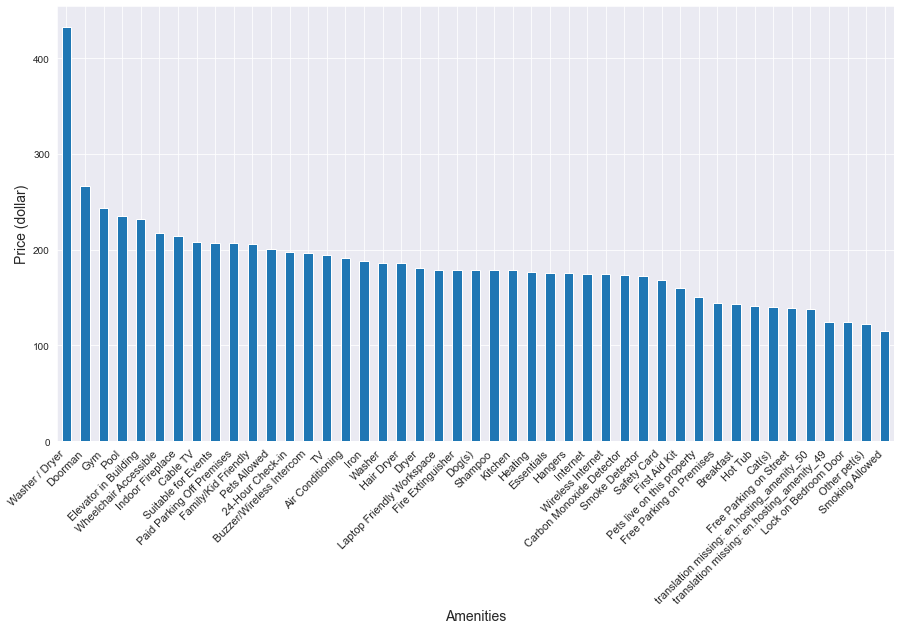

In [68]:
plt.figure(figsize=(15,8))
amenity_srs.sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('Amenities', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
plt.show()

In [69]:
cl_bst_listings['amenities'].head()

0    TV|Wireless Internet|Kitchen|Free Parking on P...
1    TV|Internet|Wireless Internet|Air Conditioning...
2    TV|Cable TV|Wireless Internet|Air Conditioning...
3    TV|Internet|Wireless Internet|Air Conditioning...
4    Internet|Wireless Internet|Air Conditioning|Ki...
Name: amenities, dtype: object

In [70]:
# Identify the top amenities
from collections import Counter
amenities = []
for index, row in cl_bst_listings.iterrows():
    row['amenities'] = row['amenities']
    mylist = row['amenities'].split('|')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3421),
 ('Heating', 3384),
 ('Kitchen', 3284),
 ('Essentials', 2994),
 ('Smoke Detector', 2911),
 ('Air Conditioning', 2821),
 ('TV', 2607),
 ('Internet', 2577),
 ('Dryer', 2476),
 ('Washer', 2475),
 ('Carbon Monoxide Detector', 2442),
 ('Shampoo', 2421),
 ('Hangers', 1985),
 ('Family/Kid Friendly', 1888),
 ('Laptop Friendly Workspace', 1834),
 ('Iron', 1828),
 ('Hair Dryer', 1811),
 ('Cable TV', 1770),
 ('Fire Extinguisher', 1582),
 ('24-Hour Check-in', 1247),
 ('First Aid Kit', 1063),
 ('Elevator in Building', 868),
 ('Buzzer/Wireless Intercom', 839),
 ('Free Parking on Premises', 831),
 ('translation missing: en.hosting_amenity_50', 581),
 ('Pets Allowed', 486),
 ('Gym', 479),
 ('Lock on Bedroom Door', 474),
 ('Safety Card', 458),
 ('translation missing: en.hosting_amenity_49', 444),
 ('Pets live on this property', 429),
 ('Indoor Fireplace', 393),
 ('Breakfast', 316),
 ('Doorman', 268),
 ('Dog(s)', 229),
 ('Cat(s)', 181),
 ('Hot Tub', 167),
 ('Pool', 160),
 (

In [71]:
# Clean Amenities field and pick the top ones

amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    cl_bst_listings[c_colname] = cl_bst_listings['amenities'].apply(lambda x: 1 if c_desc in x else 0)
    
    
    

In [72]:
cl_bst_listings = cl_bst_listings.drop('amenities', axis = 1)


In [73]:
cl_bst_listings.head(10)

,summary,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
0,"Cozy, sunny, family home. Master bedroom high...",2015-04-15,NaN,NaN,NaN,f,1,Roslindale,Roslindale,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,0.0,35.0,1,0.0,2,1125,0,NaN,f,f,moderate,NaN,1,1,1,1,1,1,1,1,1,1,0,1,1
1,Charming and quiet room in a second floor 1910...,2012-06-07,within an hour,1.00,1.00,f,1,Roslindale,Roslindale,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,0,0.0,2,15,36,94.0,f,t,moderate,1.30,1,1,1,1,1,1,1,1,1,1,1,1,0
2,"Come stay with a friendly, middle-aged guy in ...",2009-05-11,within a few hours,1.00,0.88,t,1,Roslindale,Roslindale,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,0.0,NaN,1,20.0,3,45,41,98.0,f,f,moderate,0.47,1,1,1,1,1,1,1,1,1,1,1,0,1
3,Come experience the comforts of home away from...,2013-04-21,within a few hours,1.00,0.50,f,1,NaN,Roslindale,f,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,2,25.0,1,1125,1,100.0,f,f,moderate,1.00,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"My comfy, clean and relaxing home is one block...",2014-05-11,within an hour,1.00,1.00,t,1,Roslindale,Roslindale,t,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,0.0,15.0,1,0.0,2,31,29,99.0,f,f,flexible,2.25,1,1,1,1,1,1,0,1,1,0,1,0,0
5,Super comfy bedroom plus your own bathroom in ...,2016-03-23,within a few hours,1.00,0.95,t,2,Roslindale,Roslindale,t,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,75.0,0.0,30.0,1,0.0,2,1125,8,100.0,f,f,flexible,1.70,1,1,1,1,0,0,0,1,0,1,1,0,1
6,It's a 5 minute walk to Rosi Square to catch t...,2013-05-25,within an hour,0.98,0.96,f,5,NaN,Roslindale,f,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,100.0,0.0,NaN,1,25.0,1,1125,57,90.0,f,f,strict,4.00,1,1,1,1,1,0,0,1,1,1,1,1,1
7,"We can accommodate guests who are gluten-free,...",2012-08-05,within a few hours,1.00,1.00,t,2,Roslindale,Roslindale,t,House,Private room,2,2.0,1.0,1.0,Real Bed,75.0,0.0,10.0,1,15.0,1,1125,67,96.0,f,f,moderate,2.38,1,1,0,1,1,1,1,1,1,1,1,1,1
8,Nice and cozy apartment about 6 miles away to ...,2012-10-24,within an hour,1.00,1.00,t,1,Roslindale,Roslindale,t,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,58.0,0.0,NaN,2,0.0,2,1125,65,96.0,f,f,moderate,5.36,1,1,0,1,0,1,0,1,1,0,1,0,0
9,This is a cozy and spacious two bedroom unit w...,2012-12-18,within an hour,1.00,1.00,t,2,Roslindale,Roslindale,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,229.0,200.0,50.0,4,25.0,4,10,33,94.0,f,f,strict,1.01,1,1,1,1,1,1,1,1,1,1,1,1,1


In [74]:
# Dummies for Categorical fields
cat_cols = cl_bst_listings.select_dtypes(include=['object']).columns
cat_cols

Index(['summary', 'host_since', 'host_response_time', 'host_is_superhost',
       'neighbourhood', 'neighbourhood_cleansed', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'requires_license',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [75]:
def best_neighbourhoods(df, min_listings, topn):
    
    '''
    Inputs: 
    1. df = Dataframe ( boston and seattle)  
    2. min_listings = minimum number of review for location
    3. topn= show top  n like 5, 10 results in output
    Output - A dataframe with 3 columns - Best neighbourhoods, corresponding average review scores, and the number of review  
    
    '''
    
    #Get mean review ratings by neighbourhood
    df_ngbr = df.groupby('neighbourhood_cleansed', as_index=False)['review_scores_rating'].mean().\
    sort_values('review_scores_rating', ascending=False)
    
    #Get count of listings by neighbourhood
    df_temp=df.neighbourhood_cleansed.value_counts().rename_axis('neighbourhood_cleansed').reset_index(name='counts')
    
    # Merge both averages of review ratings and number of listings into one table
    df_ngbr_cnt = pd.merge(df_ngbr, df_temp, on='neighbourhood_cleansed')
    
    #get neighbourhoods ratings, and number of listings available
    return df_ngbr_cnt[df_ngbr_cnt['counts']>=min_listings].head(topn)

In [76]:
#Top 10 neighbourhoods in Seattle with at least 10 review 
df_st_top_revw = best_neighbourhoods(cl_stl_listings,10,10)
df_st_top_revw

,neighbourhood_cleansed,review_scores_rating,counts
2,Southeast Magnolia,97.214286,17
3,Madrona,97.100000,47
4,Harrison/Denny-Blaine,97.083333,14
5,Genesee,96.933333,34
6,North Beach/Blue Ridge,96.909091,14
7,Laurelhurst,96.777778,10
8,Whittier Heights,96.666667,26
9,North Delridge,96.600000,32
10,Westlake,96.500000,17
11,North College Park,96.428571,19


In [77]:
#Top 10 neighbourhoods in boston with at least 10 review 
df_bst_top_revw = best_neighbourhoods(cl_bst_listings,10,10)
df_bst_top_revw

,neighbourhood_cleansed,review_scores_rating,counts
1,Roslindale,95.380000,56
2,West Roxbury,95.212121,46
3,South Boston Waterfront,94.431034,83
4,Jamaica Plain,94.159322,343
6,South Boston,93.980392,174
7,North End,93.725000,143
8,Charlestown,93.697368,111
9,Beacon Hill,93.378698,194
10,South End,93.264925,326
11,Bay Village,93.000000,24


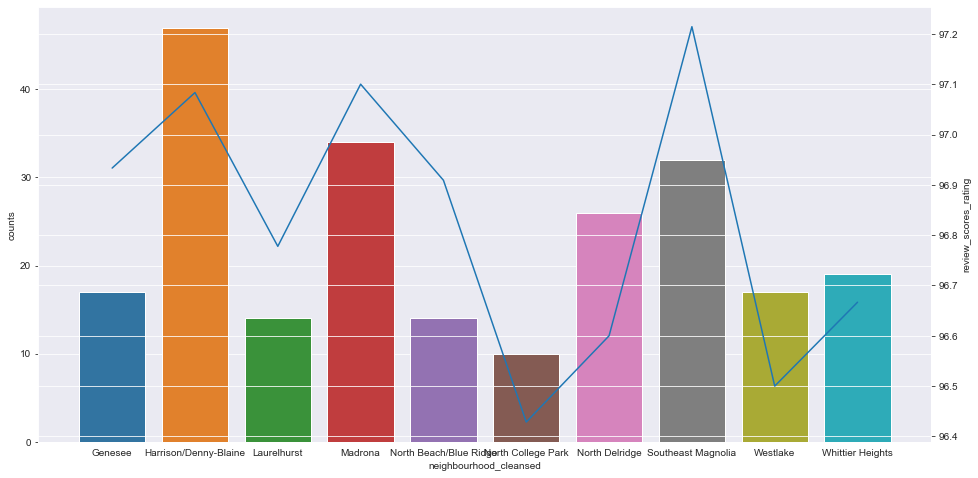

In [78]:
    fig, ax = plt.subplots(figsize= (16,8))
    ax1 = ax.twinx()
    sns.barplot(ax=ax, x=df_st_top_revw['neighbourhood_cleansed'], y=df_st_top_revw['counts']);
    sns.lineplot(ax=ax1,x=df_st_top_revw['neighbourhood_cleansed'], y=df_st_top_revw['review_scores_rating']);

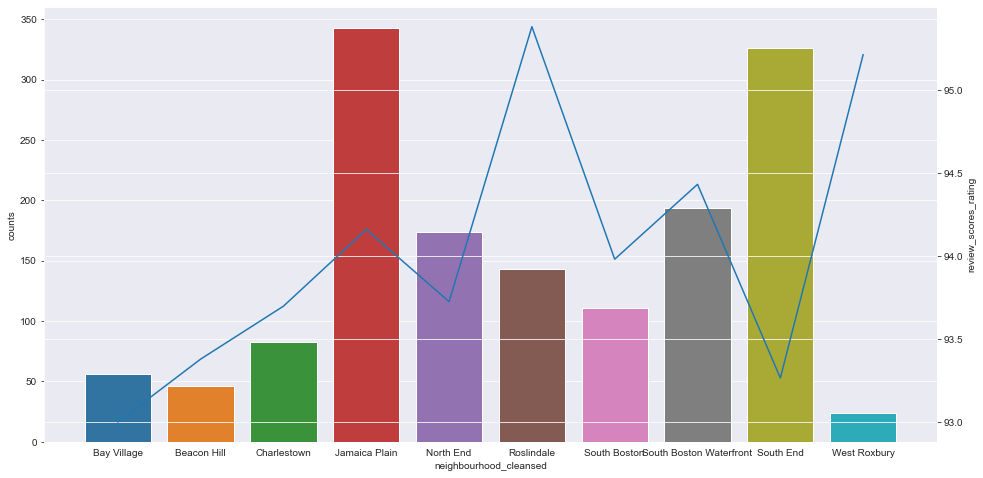

In [79]:
    fig, ax = plt.subplots(figsize= (16,8))
    ax1 = ax.twinx()
    sns.barplot(ax=ax, x=df_bst_top_revw['neighbourhood_cleansed'], y=df_bst_top_revw['counts']);
    sns.lineplot(ax=ax1,x=df_bst_top_revw['neighbourhood_cleansed'], y=df_bst_top_revw['review_scores_rating']);

# Sentiment Analysis

In [80]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [81]:
#Boston review data
df_bst_reviews = pd.read_csv('reviews_boston.csv')
df_bst_comments = df_bst_reviews[['listing_id', 'comments']].copy()
df_bst_comments.head()

,listing_id,comments
0,1178162,My stay at islam's place was really cool! Good...
1,1178162,Great location for both airport and city - gre...
2,1178162,We really enjoyed our stay at Islams house. Fr...
3,1178162,The room was nice and clean and so were the co...
4,1178162,Great location. Just 5 mins walk from the Airp...


In [82]:
bst_listings = pd.read_csv('listings_boston.csv');
bst_listings['price'] = bst_listings['price'].replace('[\$,]', '', regex=True).astype(float)
bst_listings_short = bst_listings[["id", "neighbourhood_cleansed","price"]]
bst_listings_short.rename(columns={"id" : "listing_id"}, inplace=True)
bst_listings_short.head()

C:\Users\sarth\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,listing_id,neighbourhood_cleansed,price
0,12147973,Roslindale,250.0
1,3075044,Roslindale,65.0
2,6976,Roslindale,65.0
3,1436513,Roslindale,75.0
4,7651065,Roslindale,79.0


In [83]:
df_comments_bst = pd.merge(left=df_bst_comments,right=bst_listings_short,  on ='listing_id')
df_comments_bst["comments"] = df_comments_bst["comments"].astype(str) 
df_comments_bst.head()

,listing_id,comments,neighbourhood_cleansed,price
0,1178162,My stay at islam's place was really cool! Good...,East Boston,95.0
1,1178162,Great location for both airport and city - gre...,East Boston,95.0
2,1178162,We really enjoyed our stay at Islams house. Fr...,East Boston,95.0
3,1178162,The room was nice and clean and so were the co...,East Boston,95.0
4,1178162,Great location. Just 5 mins walk from the Airp...,East Boston,95.0


In [84]:
#Seattle review data
df_stl_reviews = pd.read_csv('reviews_seattel.csv')
df_stl_comments = df_stl_reviews[['listing_id', 'comments']].copy()
df_stl_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [85]:
##Getting from partial set of Seattle listing data
stl_listings = pd.read_csv('listings_seattle.csv');
stl_listings['price'] = stl_listings['price'].replace('[\$,]', '', regex=True).astype(float)
stl_listings_short = stl_listings[["id", "neighbourhood_cleansed","price"]]
stl_listings_short.rename(columns={"id" : "listing_id"}, inplace=True)
stl_listings_short.head()

C:\Users\sarth\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,listing_id,neighbourhood_cleansed,price
0,241032,West Queen Anne,85.0
1,953595,West Queen Anne,150.0
2,3308979,West Queen Anne,975.0
3,7421966,West Queen Anne,100.0
4,278830,West Queen Anne,450.0


In [86]:
df_comments_stl= pd.merge(left=df_stl_comments,right=stl_listings_short,  on ='listing_id')
df_comments_stl["comments"] = df_comments_stl["comments"].astype(str) 
df_comments_stl.head()

,listing_id,comments,neighbourhood_cleansed,price
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,75.0
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,75.0
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,75.0
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,75.0
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,75.0


In [87]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [88]:
desc_blob_bst = [TextBlob(desc) for desc in df_comments_bst['comments']]
df_comments_bst['tb_Pol'] = [b.sentiment.polarity for b in desc_blob_bst]
df_comments_bst['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob_bst]
df_comments_bst.head()

,listing_id,comments,neighbourhood_cleansed,price,tb_Pol,tb_Subj
0,1178162,My stay at islam's place was really cool! Good...,East Boston,95.0,0.388021,0.752083
1,1178162,Great location for both airport and city - gre...,East Boston,95.0,0.600000,0.600000
2,1178162,We really enjoyed our stay at Islams house. Fr...,East Boston,95.0,0.200521,0.618750
3,1178162,The room was nice and clean and so were the co...,East Boston,95.0,0.383333,0.575000
4,1178162,Great location. Just 5 mins walk from the Airp...,East Boston,95.0,0.466667,0.601786


In [89]:
desc_blob_stl = [TextBlob(desc) for desc in df_comments_stl['comments']]
df_comments_stl['tb_Pol'] = [b.sentiment.polarity for b in desc_blob_stl]
df_comments_stl['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob_stl]
df_comments_stl.head()

,listing_id,comments,neighbourhood_cleansed,price,tb_Pol,tb_Subj
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,75.0,0.433333,0.916667
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,75.0,0.301136,0.493182
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,75.0,0.410417,0.610417
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,75.0,0.358333,0.508333
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,75.0,0.493485,0.509091


# # VADER

In [90]:
df_comments_stl_vader= pd.merge(left=df_stl_comments,right=stl_listings_short,  on ='listing_id')

df_comments_bst_vader= pd.merge(left=df_bst_comments,right=bst_listings_short,  on ='listing_id')

In [91]:
df_comments_stl_vader["comments"] = df_comments_stl_vader["comments"].astype(str)

df_comments_bst_vader["comments"] = df_comments_bst_vader["comments"].astype(str)

In [92]:
analyzer = SentimentIntensityAnalyzer()
df_comments_stl_vader['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df_comments_stl_vader['comments']]
analyzer = SentimentIntensityAnalyzer()
df_comments_bst_vader['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df_comments_bst_vader['comments']]

In [93]:
df_comments_bst_vader.head()

,listing_id,comments,neighbourhood_cleansed,price,compound
0,1178162,My stay at islam's place was really cool! Good...,East Boston,95.0,0.9626
1,1178162,Great location for both airport and city - gre...,East Boston,95.0,0.9061
2,1178162,We really enjoyed our stay at Islams house. Fr...,East Boston,95.0,0.9662
3,1178162,The room was nice and clean and so were the co...,East Boston,95.0,0.9229
4,1178162,Great location. Just 5 mins walk from the Airp...,East Boston,95.0,0.8658


In [94]:
df_comments_stl_vader.head()

,listing_id,comments,neighbourhood_cleansed,price,compound
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,75.0,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,75.0,0.9875
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,75.0,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,75.0,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,75.0,0.9783


## Function for Reference

In [95]:
# Text Blob Plot
df = df_comments_stl[df_comments_stl.price <500]

n_polarity_comm = df.groupby('neighbourhood_cleansed')[['tb_Pol']].mean().sort_values(by='tb_Pol',ascending=False)

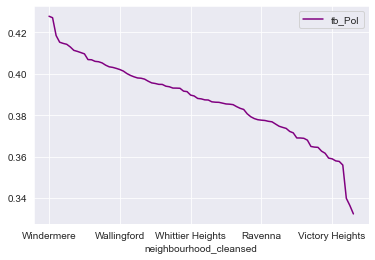

In [96]:
n_polarity_comm.plot(kind='line', color='purple');
 

In [100]:
# Text Blob Plot
df = df_comments_bst[df_comments_bst.price <500]
n_polarity_comm = df.groupby('neighbourhood_cleansed')[['tb_Pol']].mean().sort_values(by='tb_Pol',ascending=False)

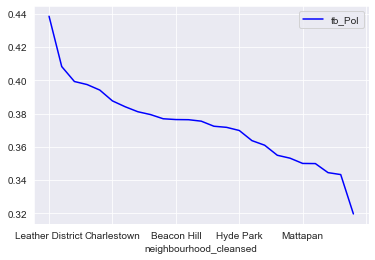

In [101]:
n_polarity_comm.plot(kind='line',color='blue');

In [102]:
# VADER Plot seattle 
df = df_comments_stl_vader[df_comments_stl_vader.price <500]
n_polarity_vader = df.groupby('neighbourhood_cleansed')[['compound']].mean().sort_values(by='compound',ascending=False)

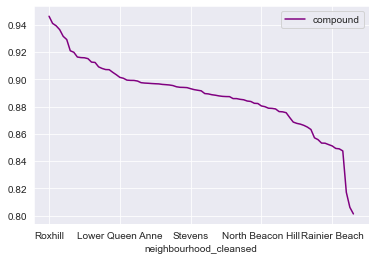

In [103]:
n_polarity_vader.plot(kind='line',color ='purple');